# Installing FRED api

In [1]:
!pip install fredapi

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import time
import scipy.stats as stats
from fredapi import Fred

# Setting some configurations

In [3]:
pd.set_option('display.max_columns', 1000) # sets the number of columns when printing out
plt.style.use('ggplot') # sets the style for plotting
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] # gets the colors from style

# Reading FRED api key

In [4]:
with open('/content/drive/MyDrive/keys/fred.json') as json_file:
  josiel_key = json.load(json_file)['api_key']

# Creating FRED object

In [5]:
fred = Fred(api_key = josiel_key)
fred

# **1) GDP per Capita**

# Searching for GDP per capita

In [6]:
search_GDPperCapita = fred.search('gross domestic product per capita', order_by = 'popularity', filter = ('units', 'Current+U.S.+Dollars'))
search_GDPperCapita

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
PCAGDPCNA646NWDB,PCAGDPCNA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for China,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:07-06:00,25,GDP per capita is gross domestic product divid...
PCAGDPCAA646NWDB,PCAGDPCAA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Canada,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:12-06:00,22,GDP per capita is gross domestic product divid...
PCAGDPJPA646NWDB,PCAGDPJPA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Japan,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:08-06:00,16,GDP per capita is gross domestic product divid...
PCAGDPDEA646NWDB,PCAGDPDEA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Germany,1970-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:08-06:00,13,GDP per capita is gross domestic product divid...
NYGDPPCAPCDPSE,NYGDPPCAPCDPSE,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for the West...,1994-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-07-04 13:42:29-05:00,13,GDP per capita is gross domestic product divid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCAGDPWSA646NWDB,PCAGDPWSA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Samoa,1982-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...
PCAGDPSRA646NWDB,PCAGDPSRA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Suriname,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...
PCAGDPTGA646NWDB,PCAGDPTGA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Togo,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...


# Plotting the GDP per capita for China

In [7]:
# Getting time series data for China
GDPperCapita_China = fred.get_series(series_id = 'PCAGDPCNA646NWDB')
GDPperCapita_China

1960-01-01       89.520214
1961-01-01       75.805561
1962-01-01       70.909152
1963-01-01       74.313372
1964-01-01       85.498243
                  ...     
2018-01-01     9905.406383
2019-01-01    10143.860221
2020-01-01    10408.719554
2021-01-01    12617.505104
2022-01-01    12720.216318
Length: 63, dtype: float64

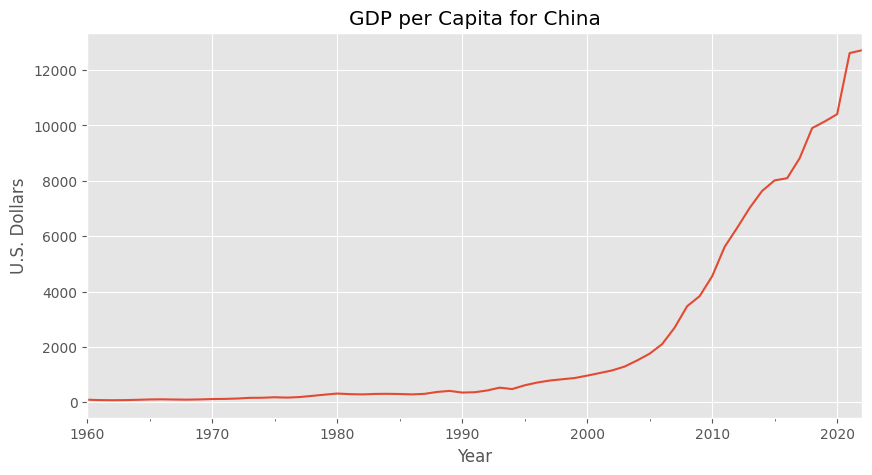

In [8]:
ax = GDPperCapita_China.plot(kind = 'line', figsize = (10, 5), title = 'GDP per Capita for China', xlabel = 'Year', ylabel = 'U.S. Dollars')

# Filtering the GDP per Capita (searching data for countries)

In [9]:
search_GDPperCapita_countries = search_GDPperCapita.loc[search_GDPperCapita['id'].str.match(pat = r'PCAGDP[A-Z][A-Z]A646NWDB')].copy()
search_GDPperCapita_countries

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
PCAGDPCNA646NWDB,PCAGDPCNA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for China,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:07-06:00,25,GDP per capita is gross domestic product divid...
PCAGDPCAA646NWDB,PCAGDPCAA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Canada,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:12-06:00,22,GDP per capita is gross domestic product divid...
PCAGDPJPA646NWDB,PCAGDPJPA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Japan,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:08-06:00,16,GDP per capita is gross domestic product divid...
PCAGDPDEA646NWDB,PCAGDPDEA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Germany,1970-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:08-06:00,13,GDP per capita is gross domestic product divid...
PCAGDPCHA646NWDB,PCAGDPCHA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Switzerland,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:13-06:00,9,GDP per capita is gross domestic product divid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCAGDPWSA646NWDB,PCAGDPWSA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Samoa,1982-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...
PCAGDPSRA646NWDB,PCAGDPSRA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Suriname,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...
PCAGDPTGA646NWDB,PCAGDPTGA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Togo,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...


In [10]:
# Extracting the country
search_GDPperCapita_countries['country'] = search_GDPperCapita_countries['title'].str.extract('Gross Domestic Product Per Capita for (.+)')
search_GDPperCapita_countries

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes,country
series id,,,,,,,,,,,,,,,,
PCAGDPCNA646NWDB,PCAGDPCNA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for China,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:07-06:00,25,GDP per capita is gross domestic product divid...,China
PCAGDPCAA646NWDB,PCAGDPCAA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Canada,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:12-06:00,22,GDP per capita is gross domestic product divid...,Canada
PCAGDPJPA646NWDB,PCAGDPJPA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Japan,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:08-06:00,16,GDP per capita is gross domestic product divid...,Japan
PCAGDPDEA646NWDB,PCAGDPDEA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Germany,1970-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:08-06:00,13,GDP per capita is gross domestic product divid...,Germany
PCAGDPCHA646NWDB,PCAGDPCHA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Switzerland,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:44:13-06:00,9,GDP per capita is gross domestic product divid...,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCAGDPWSA646NWDB,PCAGDPWSA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Samoa,1982-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...,Samoa
PCAGDPSRA646NWDB,PCAGDPSRA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Suriname,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...,Suriname
PCAGDPTGA646NWDB,PCAGDPTGA646NWDB,2024-01-08,2024-01-08,Gross Domestic Product Per Capita for Togo,1960-01-01,2022-01-01,Annual,A,Current U.S. Dollars,Current $,Not Seasonally Adjusted,NSA,2023-12-19 13:45:47-06:00,0,GDP per capita is gross domestic product divid...,Togo


# Concatenating the results of all the countries

In [11]:
all_countries = []

for id in search_GDPperCapita_countries.index:
  try:
    GDPperCapita_country = fred.get_series(series_id = id)
    GDPperCapita_country.name = search_GDPperCapita_countries.loc[id, 'country'] # add a name to the series.
    all_countries.append(GDPperCapita_country)
  except ValueError as e:
    time.sleep(60) # Error happened, wait 60 seconds.
    GDPperCapita_country = fred.get_series(series_id = id)
    GDPperCapita_country.name = id # add a name to the series.
    all_countries.append(GDPperCapita_country)

In [12]:
GDPperCapita_countries = pd.concat(all_countries, axis = 1)
GDPperCapita_countries

,China,Canada,Japan,Germany,Switzerland,Republic of Korea,United Kingdom,India,Brazil,Australia,Spain,Italy,Turkey,Malaysia,Singapore,Mexico,Peru,Argentina,France,Russian Federation,Greece,Saudi Arabia,Liberia,Qatar,Kuwait,Thailand,Kazakhstan,Costa Rica,Ukraine,Somalia,Egypt,Indonesia,Yemen,Algeria,El Salvador,Pakistan,U.S. Virgin Islands,Denmark,Ghana,Afghanistan,Czech Republic,Botswana,Lebanon,Norway,Bulgaria,Nigeria,Albania,Equatorial Guinea,United States,Brunei Darussalam,Ethiopia,Philippines,Ireland,Syrian Arab Republic,New Zealand,the former Yugoslav Republic of Macedonia,Slovakia,Cuba,Netherlands,Bhutan,Croatia,Portugal,Luxembourg,Sri Lanka,Oman,Viet Nam,Nicaragua,Belgium,Chile,Poland,Zimbabwe,Azerbaijan,Saint Kitts and Nevis,Finland,Bolivarian Republic of Venezuela,Iceland,"Hong Kong SAR, China",Uganda,Bangladesh,Iraq,United Arab Emirates,Monaco,Georgia,Comoros,Liechtenstein,Colombia,Sweden,Kenya,Nepal,Israel,South Africa,Swaziland,Rwanda,Islamic Republic of Iran,Lithuania,Myanmar,Fiji,Uzbekistan,Slovenia,Andorra,Madagascar,Burundi,Belize,Cambodia,Niger,Hungary,Chad,Ecuador,Jordan,Guatemala,Faroe Islands,New Caledonia,Barbados,Haiti,Marshall Islands,Morocco,Sudan,Serbia,PCAGDPGYA646NWDB,Saint Lucia,Bermuda,Turkmenistan,Romania,Latvia,Bosnia and Herzegovina,Democratic Republic of Timor-Leste,Aruba,the Democratic Republic of the Congo,San Marino,Armenia,United Republic of Tanzania,Antigua and Barbuda,Bahrain,Jamaica,Panama,Belarus,Cameroon,Republic of Moldova,Guinea-Bissau,Bahamas,Estonia,Cayman Islands,Zambia,Benin,Mauritius,Malawi,Senegal,Sierra Leone,Mongolia,Honduras,French Polynesia,Solomon Islands,the Plurinational State of Bolivia,Tunisia,Burkina Faso,Tajikistan,Tuvalu,Austria,Angola,Gabon,Namibia,Guinea,Uruguay,Dominican Republic,Lesotho,Kiribati,Cape Verde,Mozambique,Cyprus,Mauritania,Seychelles,Isle of Man,Mali,Grenada,Papua New Guinea,Paraguay,Central African Republic,Kosovo,Libyan Arab Jamahiriya,Maldives,Congo,Djibouti,Malta,Trinidad and Tobago,Federated States of Micronesia,Eritrea,Cote d'Ivoire,Palau,Sao Tome and Principe,Gambia,Kyrgyzstan,Montenegro,Dominica,Lao People's Democratic Republic,Macao,Saint Vincent and the Grenadines,Samoa,Suriname,Togo,Tonga,Vanuatu
1960-01-01,89.520214,2259.250511,475.319076,NaN,1787.360348,158.274136,1397.594803,83.035102,NaN,1810.597443,396.392253,804.492623,275.041699,244.611029,428.056183,359.545060,NaN,NaN,1333.881573,NaN,520.322744,NaN,NaN,NaN,NaN,103.800957,NaN,376.968786,NaN,62.861994,NaN,NaN,NaN,239.033006,NaN,81.586947,NaN,NaN,177.087737,62.369375,NaN,59.297113,NaN,1441.755660,NaN,93.397048,NaN,NaN,3007.123445,NaN,NaN,263.837124,685.614712,186.024287,2312.949992,NaN,NaN,NaN,1068.784587,NaN,NaN,360.499299,2242.015817,144.101854,NaN,NaN,NaN,1273.691659,504.801138,NaN,276.643363,NaN,218.260426,1179.353011,939.560806,1414.982269,424.056554,55.529337,84.825337,237.684587,NaN,NaN,NaN,NaN,NaN,256.962847,2114.002973,102.079868,49.993840,1229.174748,529.561923,101.652865,40.119192,196.323927,NaN,25.095809,279.534498,NaN,NaN,NaN,132.670284,71.360224,307.128629,114.972955,128.530591,NaN,103.537482,448.114797,NaN,252.756171,NaN,NaN,NaN,70.027548,NaN,172.599319,100.319817,NaN,297.586044,NaN,1902.402085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.653769,476.621422,NaN,120.018194,NaN,NaN,1483.003682,NaN,NaN,228.567399,90.035831,NaN,NaN,306.641642,139.986126,NaN,161.477559,NaN,NaN,100.673902,NaN,69.083195,NaN,NaN,935.460427,NaN,275.585339,NaN,NaN,477.786991,203.879751,46.866638,NaN,NaN,NaN,NaN,NaN,288.058144,NaN,NaN,NaN,116.079964,NaN,66.770095,NaN,NaN,NaN,124.782359,NaN,NaN,632.385227,NaN,NaN,147.277834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.294494,NaN,371.279751,73.350184,NaN,NaN
1961-01-01,75.805561,2240.433039,568.907743,NaN,1971.316323,93.831383,1472.385714,85.969704,NaN,1877.600224,450.053289,887.336745,282.742464,235.529666,449.148137,378.212028,NaN,NaN,1430.434624,NaN,590.780055,NaN,NaN,NaN,NaN,110.731456,NaN,351.201086,NaN,65.065141,NaN,NaN,NaN,209.917178,NaN,87.5173

In [13]:
# Renaming some countries
GDPperCapita_countries.rename({'the Plurinational State of Bolivia': 'Bolivia', 'Bolivarian Republic of Venezuela': 'Venezuela'}, axis = 1, inplace = True)

# Getting Data of CONMEBOL countries

In [14]:
CONMEBOL_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']
GDPperCapita_CONMEBOL_countries = GDPperCapita_countries[CONMEBOL_countries]
GDPperCapita_CONMEBOL_countries

,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
1960-01-01,NaN,100.673902,NaN,504.801138,256.962847,448.114797,NaN,NaN,477.786991,939.560806
1961-01-01,NaN,107.272777,NaN,580.888647,280.579137,369.114673,NaN,NaN,624.718633,954.355361
1962-01-01,NaN,114.881103,NaN,663.587770,296.893805,310.444942,NaN,NaN,680.299518,1006.879977
1963-01-01,NaN,121.143647,NaN,645.945373,280.993494,362.380380,NaN,NaN,592.211679,1060.570324
1964-01-01,NaN,133.661019,NaN,675.826044,336.722069,432.958436,NaN,NaN,742.952068,874.199411
...,...,...,...,...,...,...,...,...,...,...
2018-01-01,11795.162745,3471.006951,9121.020995,15820.033357,6782.037920,6321.349401,6242.961454,6912.103988,19026.049817,NaN
2019-01-01,9963.674162,3472.380831,8845.324149,14632.690308,6436.509215,6233.258167,5807.838794,6955.880824,18098.361549,NaN
2020-01-01,8500.837939,3068.812555,6923.699912,13173.784794,5304.289129,5645.199290,5353.348065,6063.626923,15650.499303,NaN
2021-01-01,10650.860460,3345.023002,7696.784830,16240.607776,6182.707099,5965.132871,5959.441794,6635.464148,17923.995333,NaN


In [15]:
# Plotting GDP per Capita in line chart
px.line(GDPperCapita_CONMEBOL_countries, labels = {'index': 'Year', 'value': 'U.S. Dollars'})

#Computing the reduction in GDP per capita in 2020 compared to the 2019


In [16]:
# computing the percectual reduction
reduction_GDPperCapita = ((GDPperCapita_CONMEBOL_countries.loc['2019-01-01'] - GDPperCapita_CONMEBOL_countries.loc['2020-01-01']) / GDPperCapita_CONMEBOL_countries.loc['2019-01-01']) * 100
# Turn series into a dataframe and then rename some columns
reduction_GDPperCapita = reduction_GDPperCapita.sort_values().to_frame().reset_index().rename({'index': 'Country', 0: '% Reduction'}, axis = 1)
reduction_GDPperCapita

,Country,% Reduction
0,Paraguay,7.825471
1,Ecuador,9.434213
2,Chile,9.970180
3,Bolivia,11.622235
4,Peru,12.827332
5,Uruguay,13.525325
6,Argentina,14.681695
7,Colombia,17.590592
8,Brazil,21.724746
9,Venezuela,NaN


In [17]:
# Plotting reduction using a bar chart
px.bar(reduction_GDPperCapita, x = 'Country', y = '% Reduction', title = 'Reduction of GDP per Capita in 2020 wrt 2019')

# **2) Life Expectancy at Birth**

# Searching for life expectancy

In [18]:
search_LifeExpectancy = fred.search('life expectancy at birth', order_by = 'popularity')
search_LifeExpectancy

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SPDYNLE00INUSA,SPDYNLE00INUSA,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the United...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:05-05:00,37,Life expectancy at birth indicates the number ...
SPDYNLE00INCHN,SPDYNLE00INCHN,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for China",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:24-05:00,6,Life expectancy at birth indicates the number ...
SPDYNLE00INPSE,SPDYNLE00INPSE,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Occupi...",1990-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:23-05:00,6,Life expectancy at birth indicates the number ...
SPDYNLE00INLIC,SPDYNLE00INLIC,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for Low Income...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-12-19 13:43:18-06:00,4,Life expectancy at birth indicates the number ...
SPDYNLE00INHIC,SPDYNLE00INHIC,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for High Incom...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-12-19 13:43:19-06:00,4,Life expectancy at birth indicates the number ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPDYNLE00INSWZ,SPDYNLE00INSWZ,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for Swaziland",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:10:13-05:00,0,Life expectancy at birth indicates the number ...
SPDYNLE00INCHI,SPDYNLE00INCHI,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Channe...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:09:50-05:00,0,Life expectancy at birth indicates the number ...
SPDYNLE00INSVK,SPDYNLE00INSVK,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Slovak...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:10:13-05:00,0,Life expectancy at birth indicates the number ...


# Filtering the Life Expectancy (searching data for countries)

In [19]:
search_LifeExpectancy_countries = search_LifeExpectancy.loc[search_LifeExpectancy['title'].str.contains('Life Expectancy at Birth, Total for ')].copy()
search_LifeExpectancy_countries

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SPDYNLE00INUSA,SPDYNLE00INUSA,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the United...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:05-05:00,37,Life expectancy at birth indicates the number ...
SPDYNLE00INCHN,SPDYNLE00INCHN,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for China",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:24-05:00,6,Life expectancy at birth indicates the number ...
SPDYNLE00INPSE,SPDYNLE00INPSE,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Occupi...",1990-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:23-05:00,6,Life expectancy at birth indicates the number ...
SPDYNLE00INLIC,SPDYNLE00INLIC,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for Low Income...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-12-19 13:43:18-06:00,4,Life expectancy at birth indicates the number ...
SPDYNLE00INHIC,SPDYNLE00INHIC,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for High Incom...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-12-19 13:43:19-06:00,4,Life expectancy at birth indicates the number ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPDYNLE00INSWZ,SPDYNLE00INSWZ,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for Swaziland",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:10:13-05:00,0,Life expectancy at birth indicates the number ...
SPDYNLE00INCHI,SPDYNLE00INCHI,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Channe...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:09:50-05:00,0,Life expectancy at birth indicates the number ...
SPDYNLE00INSVK,SPDYNLE00INSVK,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Slovak...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:10:13-05:00,0,Life expectancy at birth indicates the number ...


In [20]:
# Getting the country for each economic indicator
search_LifeExpectancy_countries['country'] = search_LifeExpectancy_countries['title'].str.extract('Life Expectancy at Birth, Total for (.+)')
search_LifeExpectancy_countries

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes,country
series id,,,,,,,,,,,,,,,,
SPDYNLE00INUSA,SPDYNLE00INUSA,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the United...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:05-05:00,37,Life expectancy at birth indicates the number ...,the United States
SPDYNLE00INCHN,SPDYNLE00INCHN,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for China",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:24-05:00,6,Life expectancy at birth indicates the number ...,China
SPDYNLE00INPSE,SPDYNLE00INPSE,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Occupi...",1990-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:08:23-05:00,6,Life expectancy at birth indicates the number ...,the Occupied Palestinian Territory
SPDYNLE00INLIC,SPDYNLE00INLIC,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for Low Income...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-12-19 13:43:18-06:00,4,Life expectancy at birth indicates the number ...,Low Income Countries
SPDYNLE00INHIC,SPDYNLE00INHIC,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for High Incom...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-12-19 13:43:19-06:00,4,Life expectancy at birth indicates the number ...,High Income Countries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPDYNLE00INSWZ,SPDYNLE00INSWZ,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for Swaziland",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:10:13-05:00,0,Life expectancy at birth indicates the number ...,Swaziland
SPDYNLE00INCHI,SPDYNLE00INCHI,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Channe...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:09:50-05:00,0,Life expectancy at birth indicates the number ...,the Channel Islands
SPDYNLE00INSVK,SPDYNLE00INSVK,2024-01-08,2024-01-08,"Life Expectancy at Birth, Total for the Slovak...",1960-01-01,2021-01-01,Annual,A,Number of Years,Number of Years,Not Seasonally Adjusted,NSA,2023-05-09 14:10:13-05:00,0,Life expectancy at birth indicates the number ...,the Slovak Republic


# Concatenating the results of all the countries

In [21]:
all_countries = []

for id in search_LifeExpectancy_countries.index:
  try:
    LifeExpectancy_country = fred.get_series(series_id = id)
    LifeExpectancy_country.name = search_LifeExpectancy_countries.loc[id, 'country'] #sets a name for the series
    all_countries.append(LifeExpectancy_country)
  except ValueError as e:
    time.sleep(60) # Error happened, wait 60 seconds.
    LifeExpectancy_country = fred.get_series(series_id = id)
    LifeExpectancy_country.name = search_LifeExpectancy_countries.loc[id, 'country'] #sets a name for the series
    all_countries.append(LifeExpectancy_country)

In [22]:
LifeExpectancy_countries = pd.concat(all_countries, axis = 1)
LifeExpectancy_countries

,the United States,China,the Occupied Palestinian Territory,Low Income Countries,High Income Countries,the United Kingdom,Least Developed Countries,Japan,Ethiopia,India,Canada,the Russian Federation,Pacific Island Small States,Germany,the Philippines,Developing Countries in Sub-Saharan Africa,Cambodia,Sweden,Peru,Upper Middle Income Countries,the United Arab Emirates,Mexico,the Republic of Korea,El Salvador,Italy,Turkey,Ghana,the Marshall Islands,Zambia,France,Lithuania,Mauritania,the World,Zimbabwe,Nigeria,Greece,Pakistan,OECD Members,Cuba,South Africa,Puerto Rico,Indonesia,the Islamic Republic of Iran,Saudi Arabia,Argentina,Bosnia and Herzegovina,Colombia,Norway,the Democratic People's Republic of Korea,the United Republic of Tanzania,Singapore,Developing Countries in Middle East and North Africa,Egypt,Sri Lanka,Nicaragua,Somalia,Chile,Mozambique,Thailand,Bangladesh,Haiti,Morocco,Kenya,Latvia,Jordan,Middle Income Countries,Algeria,Slovenia,Costa Rica,Namibia,Equatorial Guinea,Denmark,the Republic of the Congo,Poland,Chad,the Republic of South Sudan,Madagascar,Brazil,the Netherlands,Panama,Seychelles,Estonia,Albania,Uganda,the European Union,the Republic of Moldova,Jamaica,Cameroon,Israel,the Islamic Republic of Afghanistan,Suriname,Romania,Papua New Guinea,Botswana,Luxembourg,Australia,Guinea-Bissau,the former Yugoslav Republic of Macedonia,Developing Countries in Europe and Central Asia,Rwanda,Hungary,Aruba,Mali,St. Kitts and Nevis,Niger,the Bolivarian Republic of Venezuela,Portugal,Togo,Tunisia,Nepal,Paraguay,the Syrian Arab Republic,Malaysia,Iraq,the Lao People's Democratic Republic,Ukraine,Spain,Djibouti,Kazakhstan,New Zealand,Lebanon,Liberia,Belgium,Switzerland,Ecuador,Benin,the Democratic Republic of Timor-Leste,Burkina Faso,Ireland,the Central African Republic,Myanmar,Kuwait,Burundi,Curacao,Mauritius,Fiji,Malta,San Marino,Maldives,Antigua and Barbuda,Bulgaria,Comoros,Dominica,Eritrea,Guam,the Republic of Cote d'Ivoire,Finland,Lesotho,the Isle of Man,Senegal,Iceland,the Democratic Republic of the Congo,Belize,Azerbaijan,Bahrain,South Asia,the Republic of Yemen,Serbia,the Dominican Republic,Guyana,Greenland,the Sudan,Austria,Angola,Lower Middle Income Countries,the Kyrgyz Republic,Croatia,Viet Nam,Uruguay,the Plurinational State of Bolivia,the Euro Area,Cape Verde,the Collectivity of Saint Martin,Guatemala,Belarus,St. Lucia,the Republic of the Gambia,Honduras,Mongolia,Turkmenistan,Vanuatu,Uzbekistan,Developing Countries in East Asia and Pacific,Montenegro,Liechtenstein,Other Small States,Bhutan,Guinea,the Virgin Islands of the United States,Brunei Darussalam,Barbados,Tajikistan,the Solomon Islands,the Czech Republic,Kiribati,Bermuda,Kosovo,Palau,"Hong Kong SAR, China",Qatar,High Income OECD Countries,Sint Maarten,Caribbean Small States,Armenia,the Non-OECD,Malawi,French Polynesia,Macao,the Federated States of Micronesia,Saint Vincent and the Grenadines,the Bahamas,the Faroe Islands,Sierra Leone,Small States,Gabon,Sao Tome and Principe,Libyan Arab Jamahiriya,Heavily Indebted Poor Countries,the Arab World,Central Europe and the Baltics,Countries with Fragile and Conflict Affected Situations,Cyprus,Developing Countries in Latin America and Caribbean,Georgia,Grenada,Low and Middle Income Countries,New Caledonia,Oman,Samoa,Swaziland,the Channel Islands,the Slovak Republic,Tonga,Trinidad and Tobago
1950-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [23]:
LifeExpectancy_countries.dropna(how = 'all', inplace = True) # Deletes rows with complete nan values
LifeExpectancy_countries

,the United States,China,the Occupied Palestinian Territory,Low Income Countries,High Income Countries,the United Kingdom,Least Developed Countries,Japan,Ethiopia,India,Canada,the Russian Federation,Pacific Island Small States,Germany,the Philippines,Developing Countries in Sub-Saharan Africa,Cambodia,Sweden,Peru,Upper Middle Income Countries,the United Arab Emirates,Mexico,the Republic of Korea,El Salvador,Italy,Turkey,Ghana,the Marshall Islands,Zambia,France,Lithuania,Mauritania,the World,Zimbabwe,Nigeria,Greece,Pakistan,OECD Members,Cuba,South Africa,Puerto Rico,Indonesia,the Islamic Republic of Iran,Saudi Arabia,Argentina,Bosnia and Herzegovina,Colombia,Norway,the Democratic People's Republic of Korea,the United Republic of Tanzania,Singapore,Developing Countries in Middle East and North Africa,Egypt,Sri Lanka,Nicaragua,Somalia,Chile,Mozambique,Thailand,Bangladesh,Haiti,Morocco,Kenya,Latvia,Jordan,Middle Income Countries,Algeria,Slovenia,Costa Rica,Namibia,Equatorial Guinea,Denmark,the Republic of the Congo,Poland,Chad,the Republic of South Sudan,Madagascar,Brazil,the Netherlands,Panama,Seychelles,Estonia,Albania,Uganda,the European Union,the Republic of Moldova,Jamaica,Cameroon,Israel,the Islamic Republic of Afghanistan,Suriname,Romania,Papua New Guinea,Botswana,Luxembourg,Australia,Guinea-Bissau,the former Yugoslav Republic of Macedonia,Developing Countries in Europe and Central Asia,Rwanda,Hungary,Aruba,Mali,St. Kitts and Nevis,Niger,the Bolivarian Republic of Venezuela,Portugal,Togo,Tunisia,Nepal,Paraguay,the Syrian Arab Republic,Malaysia,Iraq,the Lao People's Democratic Republic,Ukraine,Spain,Djibouti,Kazakhstan,New Zealand,Lebanon,Liberia,Belgium,Switzerland,Ecuador,Benin,the Democratic Republic of Timor-Leste,Burkina Faso,Ireland,the Central African Republic,Myanmar,Kuwait,Burundi,Curacao,Mauritius,Fiji,Malta,San Marino,Maldives,Antigua and Barbuda,Bulgaria,Comoros,Dominica,Eritrea,Guam,the Republic of Cote d'Ivoire,Finland,Lesotho,the Isle of Man,Senegal,Iceland,the Democratic Republic of the Congo,Belize,Azerbaijan,Bahrain,South Asia,the Republic of Yemen,Serbia,the Dominican Republic,Guyana,Greenland,the Sudan,Austria,Angola,Lower Middle Income Countries,the Kyrgyz Republic,Croatia,Viet Nam,Uruguay,the Plurinational State of Bolivia,the Euro Area,Cape Verde,the Collectivity of Saint Martin,Guatemala,Belarus,St. Lucia,the Republic of the Gambia,Honduras,Mongolia,Turkmenistan,Vanuatu,Uzbekistan,Developing Countries in East Asia and Pacific,Montenegro,Liechtenstein,Other Small States,Bhutan,Guinea,the Virgin Islands of the United States,Brunei Darussalam,Barbados,Tajikistan,the Solomon Islands,the Czech Republic,Kiribati,Bermuda,Kosovo,Palau,"Hong Kong SAR, China",Qatar,High Income OECD Countries,Sint Maarten,Caribbean Small States,Armenia,the Non-OECD,Malawi,French Polynesia,Macao,the Federated States of Micronesia,Saint Vincent and the Grenadines,the Bahamas,the Faroe Islands,Sierra Leone,Small States,Gabon,Sao Tome and Principe,Libyan Arab Jamahiriya,Heavily Indebted Poor Countries,the Arab World,Central Europe and the Baltics,Countries with Fragile and Conflict Affected Situations,Cyprus,Developing Countries in Latin America and Caribbean,Georgia,Grenada,Low and Middle Income Countries,New Caledonia,Oman,Samoa,Swaziland,the Channel Islands,the Slovak Republic,Tonga,Trinidad and Tobago
1960-01-01,69.770732,33.275,NaN,41.085122,68.414642,71.126829,41.221473,67.695610,40.330,45.218,71.133171,67.465220,54.535021,69.064073,59.227,41.422546,42.361,73.005610,50.495,43.652139,48.811,55.017,54.320244,48.084,69.123902,50.740,47.096,53.821,49.042,69.868293,69.847317,44.767,50.894180,53.235,37.371,69.300000,44.932,67.306220,64.173,52.669,68.934,46.452,43.957,45.940,63.978,61.037,57.130,73.549756,54.050,42.937,64.694683,44.621149,45.373,60.699,46.125,43.452,57.015,41.221,51.035,44.740,43.499,42.017,48.680,69.786829,52.617,45.029518,40.532,68.978049,60.415,47.679,41.729,72.176585,47.979,67.680488,38.374,28.662,43.241,52.660,7

In [24]:
# Renaming some columns
LifeExpectancy_countries.rename({'the Plurinational State of Bolivia': 'Bolivia', 'the Bolivarian Republic of Venezuela': 'Venezuela'}, axis = 1, inplace = True)

# Getting Data of CONMEBOL countries

In [25]:
LifeExpectancy_CONMEBOL_countries = LifeExpectancy_countries[CONMEBOL_countries]
LifeExpectancy_CONMEBOL_countries

,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
1960-01-01,63.978,43.100,52.660,57.015,57.130,53.364,60.423,50.495,67.772,58.647
1961-01-01,64.360,43.400,53.183,57.537,57.730,53.895,60.755,51.091,67.895,59.407
1962-01-01,64.244,43.791,53.710,57.771,58.301,54.401,61.058,51.310,67.994,59.529
1963-01-01,64.449,44.077,54.209,57.150,58.892,54.880,61.334,52.200,68.084,60.152
1964-01-01,64.363,44.366,54.648,58.738,59.375,55.305,61.583,52.717,68.179,60.609
...,...,...,...,...,...,...,...,...,...,...
2017-01-01,76.833,67.701,74.827,80.350,76.646,76.972,73.644,75.879,77.625,71.943
2018-01-01,76.999,67.748,75.109,80.133,76.748,77.094,73.568,76.009,77.611,71.979
2019-01-01,77.284,67.841,75.338,80.326,76.752,77.297,73.621,76.156,77.508,72.161
2020-01-01,75.892,64.467,74.009,79.377,74.769,72.153,73.182,73.665,78.430,71.095


In [26]:
# plotting life expectancy in a line chart
px.line(LifeExpectancy_CONMEBOL_countries, labels = {'index': 'Year', 'value': 'Life Expectancy (years)'})

# Computing the reduction in Life Expectancy in 2020 compared to 2019

In [27]:
# computing reduction
reduction_LifeExpectancy = LifeExpectancy_CONMEBOL_countries.loc['2019-01-01'] - LifeExpectancy_CONMEBOL_countries.loc['2020-01-01']
# Turning series into a dataframe and renaming some columns
reduction_LifeExpectancy = reduction_LifeExpectancy.sort_values().to_frame().reset_index().rename({'index': 'Country', 0: 'Reduction'}, axis = 1)
reduction_LifeExpectancy

,Country,Reduction
0,Uruguay,-0.922
1,Paraguay,0.439
2,Chile,0.949
3,Venezuela,1.066
4,Brazil,1.329
5,Argentina,1.392
6,Colombia,1.983
7,Peru,2.491
8,Bolivia,3.374
9,Ecuador,5.144


In [28]:
# plotting reduction in a bar chart
px.bar(reduction_LifeExpectancy, x = 'Country', y = 'Reduction', title = 'Reduction in years in life expectancy in 2020 wrt 2019')

# **3) Checking relationship between GDP per Capita and Life Expectancy at Birth**

# Considering years from 2000 to 2021

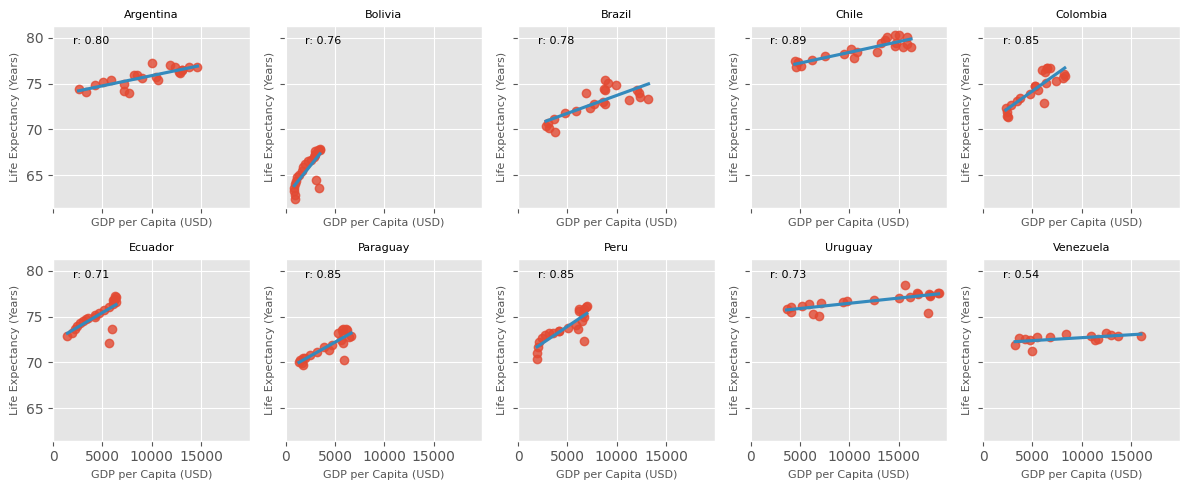

In [29]:
fig, axs = plt.subplots(2, 5, sharey = True, sharex = True, figsize = (12, 5))
axs = axs.flatten() # Turns the two-dimensional array of axes objects into an one-dimensional array
for i, country in enumerate(CONMEBOL_countries):
  country_GDPperCapita = GDPperCapita_CONMEBOL_countries.query('2000 <= index and index <= 2021')[country] # Filtering for years from 2000 to 2021
  country_LifeExpectancy = LifeExpectancy_CONMEBOL_countries.query('2000 <=index and index <= 2021')[country] # Filtering for years from 2000 to 2021
  country_data = pd.concat([country_GDPperCapita, country_LifeExpectancy], axis = 1).dropna()
  country_data.columns = ['GDP per Capita', 'Life Expectancy']
  r = stats.pearsonr(x = country_data['GDP per Capita'], y = country_data['Life Expectancy']).statistic # Computing the Pearson correlation factor
  sns.regplot(x = country_GDPperCapita, y = country_LifeExpectancy, ci = None, line_kws = {'color': colors[1]}, ax = axs[i])
  axs[i].annotate(f'r: {r:.2f}', fontsize = 8, xy = (0.1, 0.9), xycoords='axes fraction')
  axs[i].set_title(country, fontsize = 8)
  axs[i].set_xlabel('GDP per Capita (USD)', fontsize = 8)
  axs[i].set_ylabel('Life Expectancy (Years)', fontsize = 8)
fig.tight_layout()

## We can see that there is a positive correlation between the GDP per Capita and the Life Expectancy at Birth. This means that the two variables move in the same direction: if one increases the other tends to increase too. Conversely, when one variable decreases, the other tends to decrease as well.